### Candidate number: 1030
***
## Exercise 3

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from scipy.stats import norm

from arch import arch_model
from arch.__future__ import reindexing

In [229]:
class StockData:
    def __init__(self, tickers, start, end, names, period='11Y'):
        self.tickers = tickers
        self.names = {self.tickers[i]: names[i] for i in range(len(tickers))}
        self.df = yf.download(self.tickers, period=period, ignore_tz=True, progress=False, actions=True)
        self.close = pd.DataFrame(self.df['Adj Close']).loc['2013-01-01':'2023-05-31']
        self.returns = np.log(self.close/self.close.shift()).dropna()
        self.dividends = self.df['Dividends']
        self.cov = self.returns.cov()

# Ticker symbols:
tickers = ['AAPL', 'MSFT', 'BP', 'JNJ', 'NVS', 'KO', 'UL', 'JPM', 'BCS', 'SONY', '^GSPC']
# Stock names:
stock_names = ['Apple', 'Microsoft', 'BP plc', 'Johnson & Johnson', 'Novartis AG', 'The Coca Cola Company ', 'Unilever Plc', 'JP Morgan Chase & Co', 'Barclays Plc', 'Sony', 'S&P 500']
# Stock data:
data = StockData(tickers, '2013-01-01', '2023-05-31', names=stock_names)

Using the GARCH(1,1) model

C:\Users\Jone\AppData\Local\Temp\ipykernel_34200\13961369.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.variance = float(self.forecast.variance.T.iloc[-1])
C:\Users\Jone\AppData\Local\Temp\ipykernel_34200\13961369.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.variance = float(self.forecast.variance.T.iloc[-1])
C:\Users\Jone\AppData\Local\Temp\ipykernel_34200\13961369.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.variance = float(self.forecast.variance.T.iloc[-1])
C:\Users\Jone\AppData\Local\Temp\ipykernel_34200\13961369.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) ins

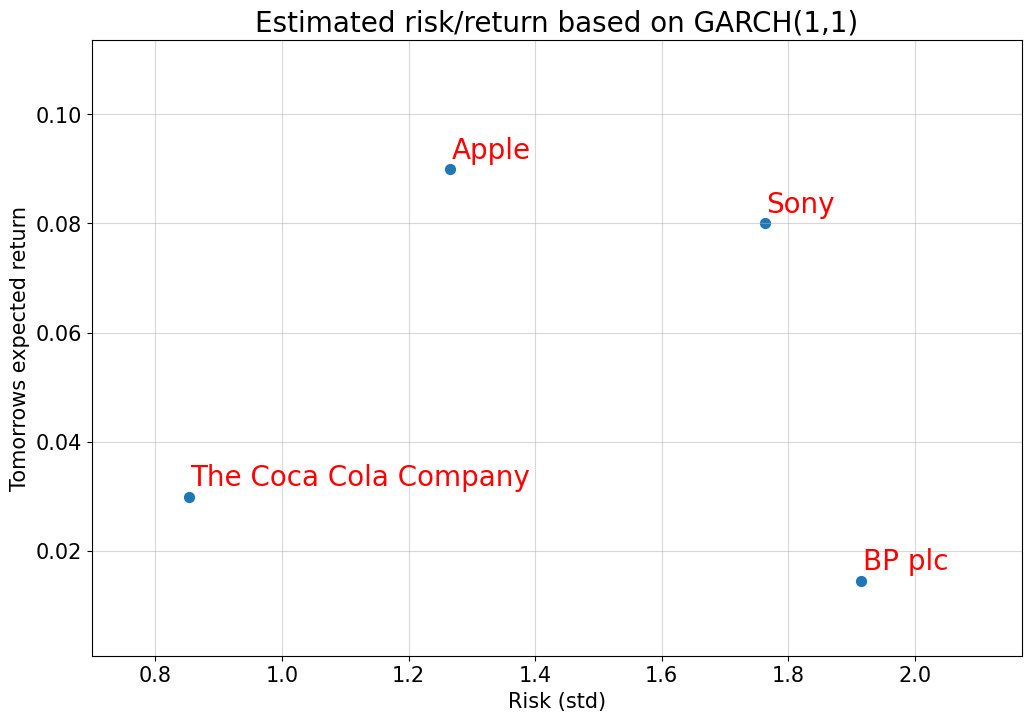

In [250]:
# Garch(1,1) model class
class Model:
    def __init__(self, ticker):
        self.ticker = ticker
        self.model = arch_model(100 * data.returns[self.ticker].dropna(), p=1, q=1, mean='constant', vol='GARCH')
        self.results = self.model.fit(disp='off')
        self.forecast = self.results.forecast(horizon = 1)
        self.variance = float(self.forecast.variance.T.iloc[-1])

# The selected stocks
selected = ['AAPL', 'BP', 'KO', 'SONY']


models, std_list = dict(), list()

# Creating result dataframe
risk_return = pd.DataFrame(columns=['mean', 'std'])
risk_return['mean'] = data.returns[selected].mean() * 100

# Creating models for selected stocks
for i, ticker in enumerate(selected):
    models[ticker] = Model(ticker)
    std_list.append(np.sqrt(models[ticker].variance))


risk_return['std'] = std_list

# Plotting risk/return diagram
risk_return.plot.scatter(x="std", y="mean", figsize=(12,8), s=50, fontsize=15)
for i in risk_return.index:
    plt.annotate(data.names[i], xy=(risk_return.loc[[i],"std"] + 0.002, risk_return.loc[i,"mean"] + 0.002), size=20, color='red')

# Adjusting plot limits
plt.xlim((plt.xlim()[0]-0.1, plt.xlim()[1]+0.2))
plt.ylim((plt.ylim()[0]-0.01, plt.ylim()[1]+0.02))

plt.xlabel("Risk (std)",fontsize = 15)
plt.ylabel("Tomorrows expected return",fontsize = 15)
plt.title("Estimated risk/return based on GARCH(1,1)", fontsize=20)
plt.grid(alpha=0.5);


The recomendation based on the Garch(1,1) model and estimated risk/return tradeoff diagram would be either Apple or The Coca Cola Company, based on how risk averse the investor is (Higher risk and return: Apple, Lower risk and return: The Coca Cola Company).